## CSE 572: DATA MINING
### HW 3
### Recomender Systems

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357278 sha256=66279ab73ae8b1ef41d8713bc3b160724d0688b8f402cdbfb9591893ff7f9a23
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import numpy as np
import pandas as pd
from surprise import Dataset, SVD, Reader, KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('ratings_small.csv')
print(data.head())

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


In [6]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

## Part c

### PMF

In [8]:
algo = SVD()

results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8975  0.8946  0.9050  0.8937  0.8925  0.8967  0.0045  
MAE (testset)     0.6921  0.6890  0.6966  0.6871  0.6903  0.6910  0.0032  
Fit time          4.11    3.55    2.26    2.57    2.06    2.91    0.79    
Test time         0.77    0.21    0.26    0.32    0.15    0.34    0.22    


### UBCF

In [12]:
sim_options = {'user_based': True}
algo_user = KNNBasic(sim_options=sim_options)
cross_validate(algo_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9748  0.9671  0.9644  0.9756  0.9620  0.9688  0.0055  
MAE (testset)     0.7515  0.7448  0.7388  0.7508  0.7388  0.7449  0.0055  
Fit time          0.19    0.29    0.25    1.02    0.25    0.40    0.31    
Test time         1.78    1.99    1.94    3.43    1.82    2.19    0.62    


{'test_rmse': array([0.97476057, 0.96711088, 0.96437376, 0.97558453, 0.96197463]),
 'test_mae': array([0.75145929, 0.74484501, 0.73879475, 0.75081913, 0.73875523]),
 'fit_time': (0.18527936935424805,
  0.2859764099121094,
  0.2501223087310791,
  1.0173442363739014,
  0.24663972854614258),
 'test_time': (1.7802655696868896,
  1.9949641227722168,
  1.9426610469818115,
  3.431511402130127,
  1.821023941040039)}

### IBCF

In [13]:
sim_options = {'user_based': False}
algo_item = KNNBasic(sim_options=sim_options)
cross_validate(algo_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9373  0.9334  0.9310  0.9314  0.9387  0.9343  0.0031  
MAE (testset)     0.7229  0.7198  0.7167  0.7212  0.7220  0.7205  0.0022  
Fit time          5.41    5.98    5.46    5.14    5.78    5.55    0.29    
Test time         10.16   10.66   10.56   10.54   10.60   10.50   0.18    


{'test_rmse': array([0.93731616, 0.93335286, 0.93102262, 0.93139489, 0.93866218]),
 'test_mae': array([0.72290397, 0.71979676, 0.71672166, 0.72122671, 0.72201769]),
 'fit_time': (5.406250476837158,
  5.975594997406006,
  5.4567811489105225,
  5.140227317810059,
  5.780171871185303),
 'test_time': (10.161421537399292,
  10.656353950500488,
  10.558845520019531,
  10.539220809936523,
  10.59545373916626)}

## Part e

### UBCF

In [15]:
metrics = ['cosine', 'msd', 'pearson']
rmse_ubcf = []
mae_ubcf = []

for metric in metrics:
    sim_options = {'name': metric, 'user_based': True}
    algo = KNNBasic(sim_options=sim_options)
    result = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    rmse_ubcf.append((metric, result['test_rmse'].mean()))
    mae_ubcf.append((metric, result['test_mae'].mean()))


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [22]:
print("RMSE: ",rmse_ubcf)
print("MAE:  ",mae_ubcf)

RMSE:  [('cosine', 0.9942908497771947), ('msd', 0.9689974328565052), ('pearson', 0.998353801103647)]
MAE:   [('cosine', 0.7683905120750587), ('msd', 0.7449140789042694), ('pearson', 0.772948279691847)]


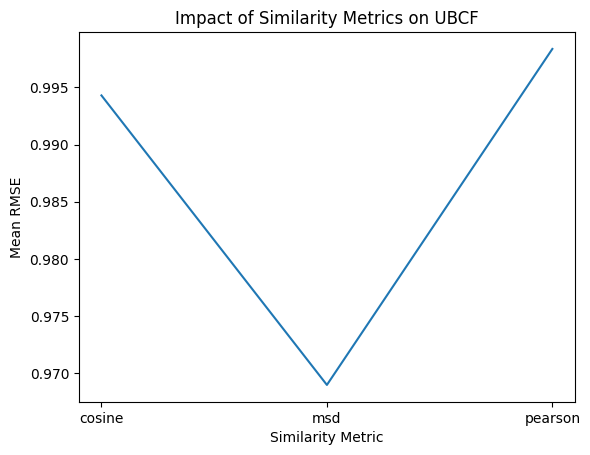

In [18]:
x, y = zip(*rmse_ubcf)
plt.plot(x, y)
plt.xlabel('Similarity Metric')
plt.ylabel('Mean RMSE')
plt.title('Impact of Similarity Metrics on UBCF')
plt.show()

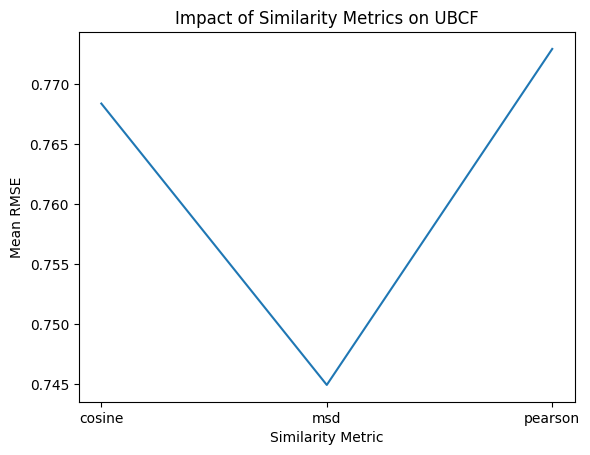

In [19]:
x, y = zip(*mae_ubcf)
plt.plot(x, y)
plt.xlabel('Similarity Metric')
plt.ylabel('Mean RMSE')
plt.title('Impact of Similarity Metrics on UBCF')
plt.show()

### IBCF

In [24]:
metrics = ['cosine', 'msd', 'pearson']
rmse_ibcf = []
mae_ibcf = []

for metric in metrics:
    sim_options = {'name': metric, 'item_based': True}
    algo = KNNBasic(sim_options=sim_options)
    result = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    rmse_ibcf.append((metric, result['test_rmse'].mean()))
    mae_ibcf.append((metric, result['test_mae'].mean()))


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [25]:
print("RMSE: ",rmse_ibcf)
print("MAE:  ",mae_ibcf)

RMSE:  [('cosine', 0.9938694743337069), ('msd', 0.9677122203898054), ('pearson', 0.9990764312259757)]
MAE:   [('cosine', 0.7679983783319962), ('msd', 0.7444308376743007), ('pearson', 0.7735964140748297)]


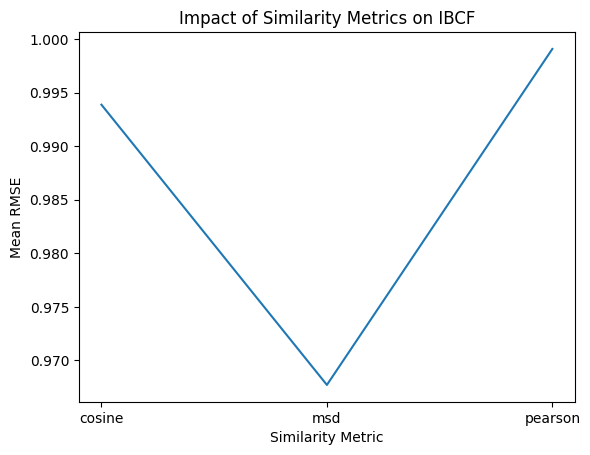

In [26]:
x, y = zip(*rmse_ibcf)
plt.plot(x, y)
plt.xlabel('Similarity Metric')
plt.ylabel('Mean RMSE')
plt.title('Impact of Similarity Metrics on IBCF')
plt.show()

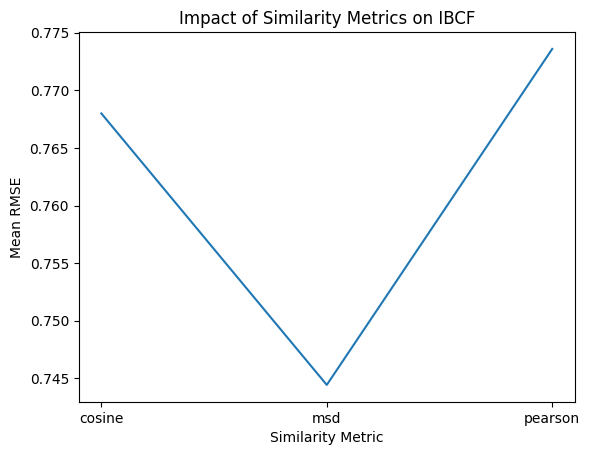

In [27]:
x, y = zip(*mae_ibcf)
plt.plot(x, y)
plt.xlabel('Similarity Metric')
plt.ylabel('Mean RMSE')
plt.title('Impact of Similarity Metrics on IBCF')
plt.show()

## Part f

### UBCF

In [28]:
ks = [i for i in range(1,101)]
rmse_values = {}
mae_values = {}
for k in ks:
    algo = KNNBasic(k=k, sim_options={'name': 'cosine', 'user_based': True})
    result = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    rmse_values[k] = result['test_rmse'].mean()
    mae_values[k] = result['test_mae'].mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [29]:
print("RMSE: \n",rmse_values)
print("\n--------------------------------\n")
print("MAE:  \n",mae_values)

RMSE: 
 {1: 1.3109997869693655, 2: 1.150135760259587, 3: 1.0854968300354177, 4: 1.0590263611226425, 5: 1.0435557361726722, 6: 1.030176766757394, 7: 1.0237152260212257, 8: 1.0157883816529307, 9: 1.012790243297184, 10: 1.008750849924523, 11: 1.006353310575517, 12: 1.0049011775856806, 13: 1.0028531641522895, 14: 1.000967229130477, 15: 1.000288268141173, 16: 1.0012923503161535, 17: 0.9983273633554812, 18: 0.9964827042284744, 19: 0.9962493035494401, 20: 0.9963832091846612, 21: 0.996394816497147, 22: 0.9953822238514043, 23: 0.9952049092549989, 24: 0.994376799275155, 25: 0.995785894354551, 26: 0.9938848377804531, 27: 0.9956795510993736, 28: 0.995743153776721, 29: 0.9950996075511839, 30: 0.9934278966808012, 31: 0.9936165821359955, 32: 0.9946109352168172, 33: 0.9942643782876075, 34: 0.9938551972011798, 35: 0.9928239231205737, 36: 0.9934555998877116, 37: 0.994518975471388, 38: 0.994425696118762, 39: 0.9945047875277723, 40: 0.9937222144373706, 41: 0.9931115575200868, 42: 0.9945010836483679, 43: 0

In [35]:
min_rmse_value = min(rmse_values.values())
min_rmse_key = min(rmse_values, key=rmse_values.get)

print(f"Minimum RMSE value: {min_rmse_value}")
print(f"Corresponding k value: {min_rmse_key}")


Minimum RMSE value: 0.9923432219991094
Corresponding k value: 55


In [36]:
min_mae_value = min(mae_values.values())
min_mae_key = min(mae_values, key=mae_values.get)

print(f"Minimum MAE value: {min_mae_value}")
print(f"Corresponding k value: {min_mae_key}")

Minimum MAE value: 0.7665228386236069
Corresponding k value: 30


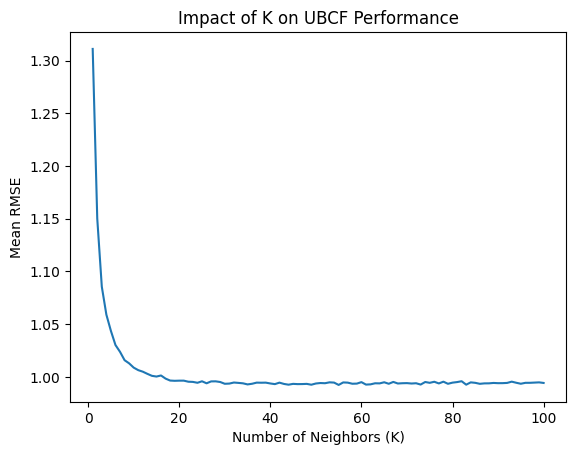

In [32]:
plt.plot(rmse_values.keys(), rmse_values.values())
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean RMSE')
plt.title('Impact of K on UBCF Performance')
plt.show()

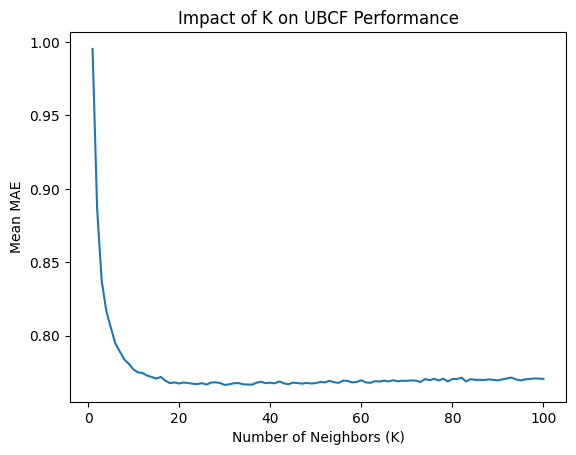

In [34]:
plt.plot(mae_values.keys(), mae_values.values())
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean MAE')
plt.title('Impact of K on UBCF Performance')
plt.show()

### IBCF

In [37]:
ks = [i for i in range(1,101)]
rmse_values = {}
mae_values = {}
for k in ks:
    algo = KNNBasic(k=k, sim_options={'name': 'cosine', 'item_based': True})
    result = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    rmse_values[k] = result['test_rmse'].mean()
    mae_values[k] = result['test_mae'].mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [38]:
print("RMSE: \n",rmse_values)
print("\n--------------------------------\n")
print("MAE:  \n",mae_values)

RMSE: 
 {1: 1.302338302003525, 2: 1.1475082581505522, 3: 1.0888755178592386, 4: 1.0577588797305206, 5: 1.0428444270822959, 6: 1.0317096634708194, 7: 1.0241713617993107, 8: 1.0169429847525937, 9: 1.012871816098685, 10: 1.0111913967937354, 11: 1.0060899901291136, 12: 1.0044807745188864, 13: 1.003137450970268, 14: 1.002400211549806, 15: 1.0005872413080001, 16: 0.9996542111835772, 17: 0.9989888511339948, 18: 0.9963740242624498, 19: 0.9962303312557342, 20: 0.9963706586829127, 21: 0.9961278879872083, 22: 0.9954860638963142, 23: 0.9954951022649894, 24: 0.9959668459721591, 25: 0.9957653525622374, 26: 0.9949521586958774, 27: 0.9959764757665267, 28: 0.9952283841892319, 29: 0.9935788555549563, 30: 0.9933697144653599, 31: 0.993885141330702, 32: 0.9939820765826672, 33: 0.9945115877230479, 34: 0.9938314653116859, 35: 0.9946985458193934, 36: 0.9945746648718268, 37: 0.9937009166890446, 38: 0.9940923958163495, 39: 0.9943349118522272, 40: 0.993555200365256, 41: 0.9933872893804973, 42: 0.9941106682180856

In [39]:
min_rmse_value = min(rmse_values.values())
min_rmse_key = min(rmse_values, key=rmse_values.get)

print(f"Minimum RMSE value: {min_rmse_value}")
print(f"Corresponding k value: {min_rmse_key}")


Minimum RMSE value: 0.9915285825388809
Corresponding k value: 43


In [40]:
min_mae_value = min(mae_values.values())
min_mae_key = min(mae_values, key=mae_values.get)

print(f"Minimum MAE value: {min_mae_value}")
print(f"Corresponding k value: {min_mae_key}")

Minimum MAE value: 0.7665276796265188
Corresponding k value: 43


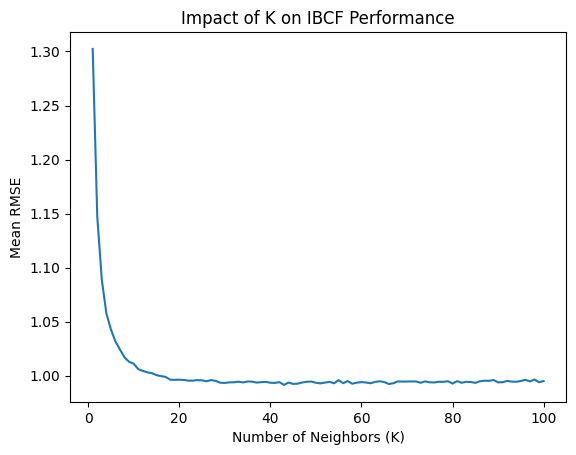

In [42]:
plt.plot(rmse_values.keys(), rmse_values.values())
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean RMSE')
plt.title('Impact of K on IBCF Performance')
plt.show()

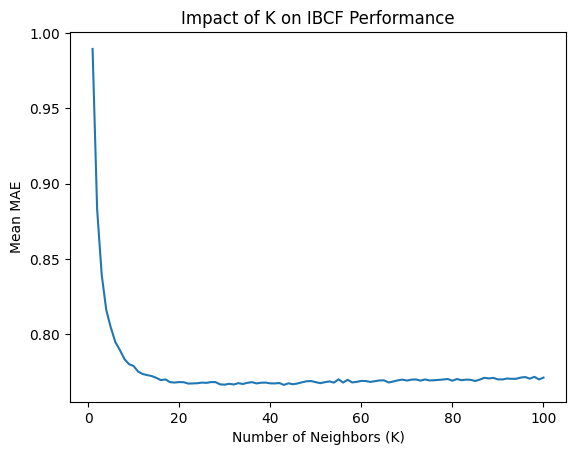

In [43]:
plt.plot(mae_values.keys(), mae_values.values())
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean MAE')
plt.title('Impact of K on IBCF Performance')
plt.show()